# Preliminary: getting ECG data

In this and following tutorials you will work with ECG data throught CardIO framework. 

We suggest loading ECG data from the PhysioNet database of short single lead ECG recording. Follow this [link](https://physionet.org/challenge/2017/) and find archive "training2017.zip" or use [direct](https://physionet.org/challenge/2017/training2017.zip) link. However, if you do not want to load large dataset now, you can find several ECGs from that database in folder cardio/tests/data (this folder is icluded in CardIO repository).

The PhysioNet archive contains 8.528 ECGs in [wfdb](https://www.physionet.org/physiotools/wpg/wpg_35.htm) format. Each ECG has a unique index ranging from "A00001" to "A08528". According to wbdf format ECG record consists of several files with the same name but different extensions. We will work with files with ```.hea``` and ```.mat``` extensions. File ```.hea``` contains signal, while ```.mat``` contains meta information about the signal (e.g. sample rate). 

Since the PhysioNet acrhive was prepared for arrhythmia classification challenge, it also contains REFERENCE.csv file, where each ECG index is labeled with one of four classes:
* Normal rhythm
* AF
* Other rhythm
* Noise

Read [here](https://physionet.org/challenge/2017/) more about PhysioNet database.

# Create a dataset of ECGs

In Notebook 1 we explain how to create a [dataset](https://github.com/analysiscenter/dataset/) of ECGs and give very basic examples how to use dataset. 

## Index ECG

Working with ECG begins with ```FilesIndex```. ```FilesIndex``` contains index and location of each ECG record we want to process. 

Let all ECGs be stored in wfdb format in folder with path '../cardio/tests/data/' (if you cloned the CardIO repository from [Git](https://github.com/analysiscenter/cardio), this path will actually contain several examples of ECGs). Let's create a new ```FilesIndex``` with all ECGs from this folder.

In [1]:
import sys
sys.path.append("..")

import cardio.dataset as ds
index = ds.FilesIndex(path="../cardio/tests/data/*.hea", no_ext=True, sort=True)

Now each ECG is indexed with its filename. Indices are stored in ```index.indices```:

In [2]:
print(index.indices)

['A00001' 'A00002' 'A00004' 'A00005' 'A00008' 'A00013']


## Init dataset

We have ```index``` that knows which ECGs we want to process. CardIO processes data grouped in batches of class [EcgBatch](https://github.com/analysiscenter/cardio/blob/master/doc/batch.md). To generate proper batches we create a dataset:

In [3]:
from cardio import EcgBatch
eds = ds.Dataset(index, batch_class=EcgBatch)

Note that the same result can be obtained in a shorter way:
```python
from cardio import EcgDataset
eds = EcgDataset(path="../cardio/tests/data/*.hea", no_ext=True, sort=True)
```

## Start using dataset

Let's generate a first batch of some size, say 6:

In [4]:
batch = eds.next_batch(batch_size=6)

However ```batch``` still does not contain any data, only indices and paths to ECGs. To fill it with data we need to apply load action. Next section shows how to apply actions.

## Apply actions

Any preprocess typically begins with loading of data. Therefore, we start with an example how to apply action [```load```](https://analysiscenter.github.io/cardio/api/cardio.batch.html#cardio.batch.EcgBatch.load). 

Note that paths to ECGs are already stored in batch, so simply inticate data format, which is wfdb, and components of wbdf file we want to load. We load components ```signal```  and  ```meta```:

In [5]:
batch_with_data = batch.load(fmt="wfdb", components=["signal", "meta"])

Now ```batch_with_data``` contatains loaded ECGs. Any ECG record can be accessed by its index, e.g. ```batch_with_data['A00001']```. ECG components, signal and meta, can be accessed as ```batch_with_data['A00001'].signal``` and ```batch_with_data['A00001'].meta``` correspondingly.

Let's plot signal from ECG with index```'A00001'```:

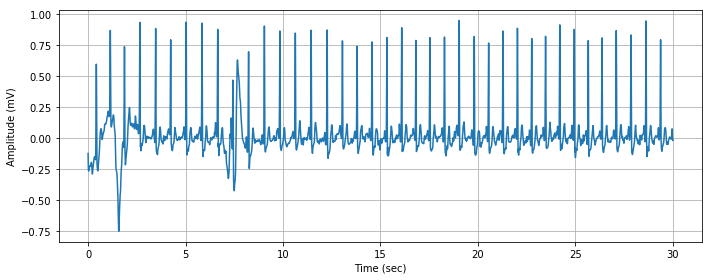

In [6]:
batch_with_data.show_ecg('A00001')

Any other action can be applied to ```batch_with_data``` in the same way as ```load```. Let's consider e.g. action [```flip_signals```](https://analysiscenter.github.io/cardio/api/cardio.batch.html#cardio.batch.EcgBatch.flip_signals). It flips signals whose R-peaks are directed downwards.

Note that ```flip_signals``` modifies batch inplace, so we create copy of the batch:

In [7]:
original_batch = batch_with_data.deepcopy()

And then apply ```flip_signal``` action:

In [8]:
batch_with_data.flip_signals()

Now we can compare results. Let's consider signal with index 'A00013', whose R-peaks were originally directed downwards:

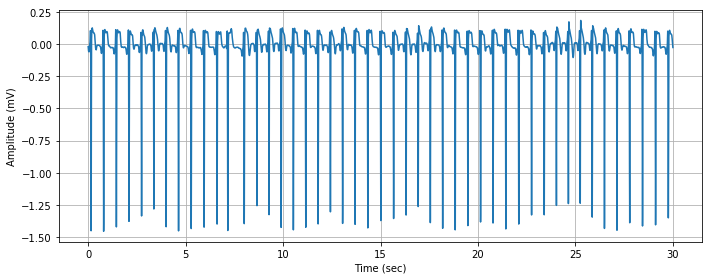

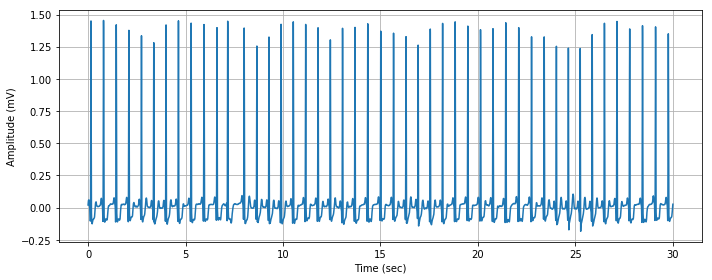

In [9]:
original_batch.show_ecg('A00013')

batch_with_data.show_ecg('A00013')

Reading [documentation](https://analysiscenter.github.io/cardio/api/cardio.batch.html) on EcgBatch you will find more actions that can be applied to batches.

Summarizing, in Notebook 1 we learned:
* how to get ECG data
* how to create datasets
* how to apply actions.

In the next [Notebook 2](https://github.com/analysiscenter/cardio/blob/hmm_model_update/tutorials/II.Pipelines.ipynb) we will combine actions in pipeline.